2개의 클래스간의 비율이(데이터불균형) 심할경우 성능이 좋지못함. 

그래서 하나의 곳에 가짜 데이터를 만들어줌 
(실제 데이터에 근거한)

즉 데이터의 불균형을 해결하는 방법중 하나가 데이터증강 이다 
데이터증강은 학습데이터를 늘리는 방법을 총칭한다. 


https://opencv.org/

여기서 튜토리얼같은것도 있음 한번봐도됨 


In [17]:
import cv2

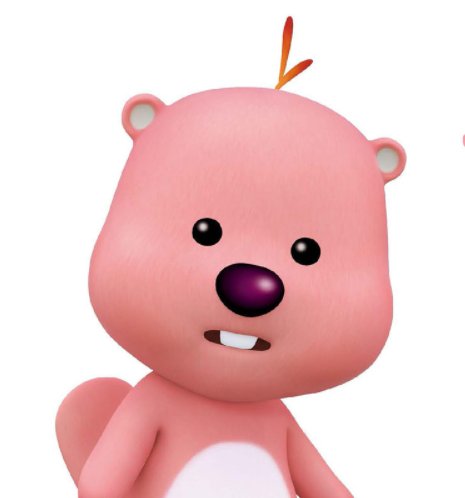

In [2]:
import urllib.request  
url = "https://img1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/dFGD/image/MH85tgXHFdoO6f8R3N_VcIjHStw.png"
 
urllib.request.urlretrieve(url, "a.png") 
from IPython.display import Image 
Image(filename='a.png')

In [44]:
img = cv2.imread("C:/Users/carlo/Desktop/AI_CWNU/imageLoopie.png",cv2.IMREAD_COLOR) #imread로 불러와서 
# img = cv2.imread("C:/Users/carlo/Desktop/AI_CWNU/imageLoopie.png",cv2.IMREAD_GRAYSCALE) #GRAYSCALE 은 2차윈 ,흑백
# img = cv2.imread("C:/Users/carlo/Desktop/AI_CWNU/imageLoopie.png",cv2.REDUCED_GRAYSCALE_2) # 2차윈,사이즈가 2분의 1  

#★★★ 불러올때 경로에 한글로 된 글있으면 안되니.   ./imageLoopie.png  해주면 됨 

type(img) #넘파일 계열이고 
print(img.shape) 
# height, width, channel = (498,465,3)
height, width, channel = img.shape
print(img.shape[0] , width , img.shape[2])

(498, 465, 3)
498 465 3


In [45]:
#칼라
cv2.imshow("Loopie",img) 
cv2.waitKey() #킨다음에 x 누르지말고 그냥 아무키나 typing 하면 꺼짐 
cv2.destroyAllWindows()

In [34]:
#흑백
img = cv2.imread("C:/Users/carlo/Desktop/AI_CWNU/imageLoopie.png",cv2.IMREAD_GRAYSCALE) 
height, width  = img.shape
cv2.imshow("Loopie",img) 
cv2.waitKey()  
cv2.destroyAllWindows()

In [56]:
#FLIP 상하 변경    
filpimage=cv2.flip(flipimg,0) #0 => 위아래  1 이상=> 좌우 변경
cv2.imshow("Original ",img)
cv2.imshow("Fliped ",filpimage)
cv2.waitKey()
cv2.destroyAllWindows()

In [76]:
#회전 
rotation_matrix = cv2.getRotationMatrix2D((width/2 , height/2),90,1)      # 90 ==> 각도  , 1 ==> 크기 비율, 1은 원본 크기를 유지

# rotated_image = cv2.warpAffine(img,rotation_matrix , (width,height))
# rotated_image = cv2.warpAffine(img,rotation_matrix , (width,height),borderMode=cv2.BORDER_REFLECT) #옆으로 복사
rotated_image = cv2.warpAffine(img,rotation_matrix , (width,height),borderMode=cv2.BORDER_REPLICATE)#주변픽셀이용해서 나머지 테두리
cv2.imshow("Original ",img)                                                                         #다채워줌 
cv2.imshow("Fliped ",rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

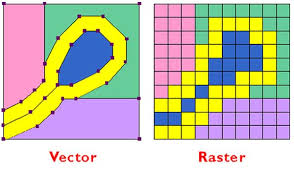

In [6]:
url1 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeuqc4UJx9T8hPSC9r_DRSv7c9CS5urFPwMA&usqp=CAU" 
urllib.request.urlretrieve(url1, "b.png") 
from IPython.display import Image 
Image(filename='b.png')

# OpenCV 는 picsel 기반으로만 가능  // vector 기반은 처리못함 
# vector 기반으로된 레스터 이미지 

In [15]:
import os
import cv2

In [3]:
#현재 디렉토리를 알아냄 
current_directory= os.getcwd() 
current_directory

'C:\\Users\\carlo\\Carlos'

In [4]:
#현재 디렉토리에 "images"  이름의 폴더가 있는지 검사 
#있으면 안만들고 없으면 듦
if not os.path.exists(os.path.join(current_directory,"images")):
    os.mkdir("images") 

In [7]:
image = cv2.imread("C:/Users/carlo/Desktop/AI_CWNU/imageLoopie.png",cv2.IMREAD_COLOR) 
height, width, channel = image.shape

#이미지를 10도씩 회전시키면서 새로운 이미지를 만들어 저장함 
for angle in range(0,360,10):
    rotation_matrix = cv2.getRotationMatrix2D((width/2 , height/2),angle,1) 
    rotated_image = cv2.warpAffine(image , rotation_matrix , (width,height),borderMode=cv2.BORDER_REFLECT) 
    cv2.imwrite("./images/rotated_image_%d.jpg" %angle , rotated_image )

In [13]:
#이미지 확대 , 축소
upsampled_image = cv2.pyrUp(image, dstsize = (width*2 , height *2) , borderType=cv2.BORDER_DEFAULT) #pyr 피라미드 ,dst 목적지크기
downsampled_image = cv2.pyrDown(image,dstsize=(width//2 , height//2))                   

cv2.imshow("Original ", image)
cv2.imshow("upsampled_image ", upsampled_image)
cv2.imshow("downsampled_image ", downsampled_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
#이미지를 늘리고, 줄이기 
absolute_image =cv2.resize(image,dsize=(640,480),interpolation =cv2.INTER_LINEAR) # 직접적으로 이미지 크기로 지정 
relative_image =cv2.resize(image,dsize=(0,0),fx=0.3,fy=0.7 , interpolation = cv2.INTER_AREA) #fx 원본이미지의 30% 를 70% 줄인다

cv2.imshow("Original ", image)
cv2.imshow("absolute_image ", absolute_image)
cv2.imshow("relative_image ", relative_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("Loopie.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 흑백으로 변환
plt.imshow(img, cmap='gray')
plt.show()

error: OpenCV(4.6.0) C:\ci_311_rebuilds\opencv-suite_1679001454889\work\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
img.shape

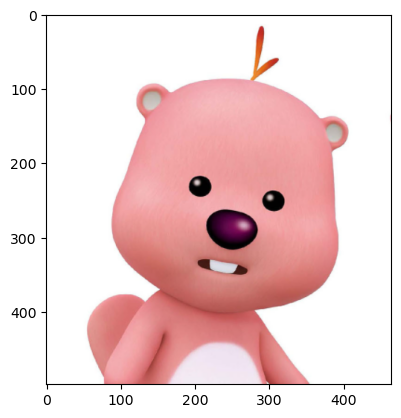

In [4]:
img = cv2.imread("C:/Users/carlo/Desktop/AI_CWNU/imageLoopie.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # BGR을 RGB로 변환
plt.imshow(img)
plt.show()

In [5]:
img.shape

(498, 465, 3)

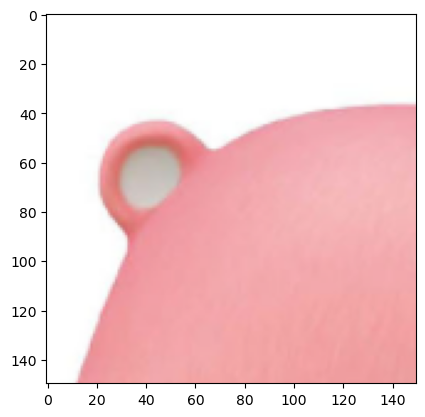

In [23]:
crop_img = img[50:200, 100:250].copy() #원하는 부분 자르기
# crop_img[100:300] = cv2.cvtColor(crop_img[100:300], cv2.COLOR_RGB2BGR)
plt.imshow(crop_img)
plt.show()

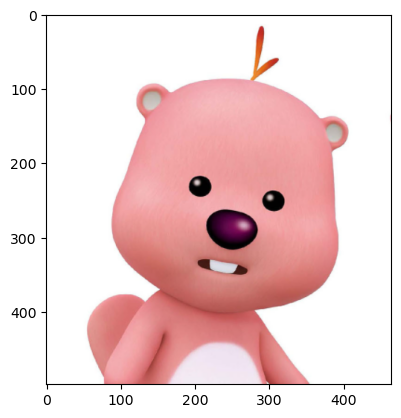

In [7]:
plt.imshow(img)
plt.show()

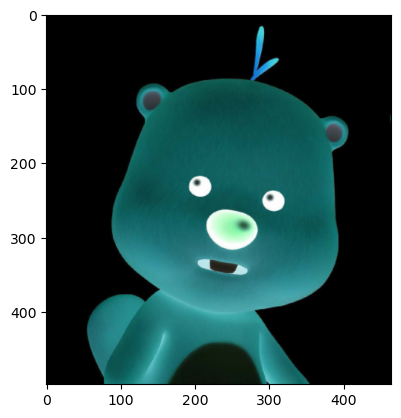

In [8]:
bn_img = cv2.bitwise_not(img) #역상: 색상반전
plt.imshow(bn_img)
plt.show()

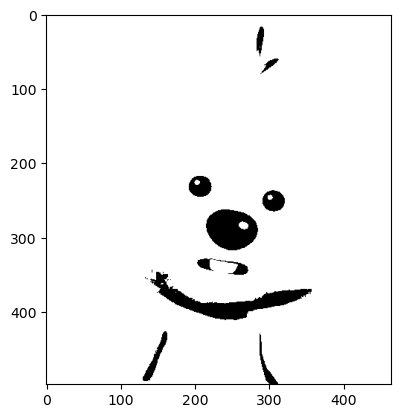

In [29]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # 판화효과
_, bin_img = cv2.threshold(gray_img, 125,255, cv2.THRESH_BINARY) # threshold: 임계값, 경계값
plt.imshow(bin_img, cmap='gray')
plt.show()

In [10]:
print(_)

122.0


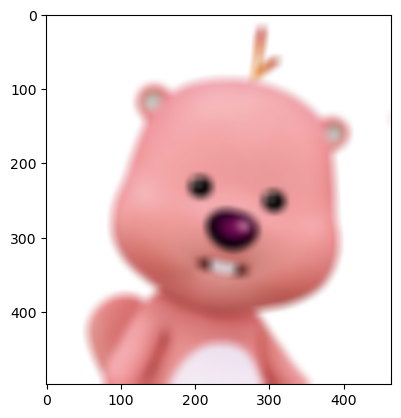

In [34]:
blur_img = cv2.blur(img, (16, 16)) #블러 처리  #필터 사이즈가 2의 승수가 되어야 표준 해상도일 때, 딱 나눠떨어진다.
plt.imshow(blur_img)
plt.show()

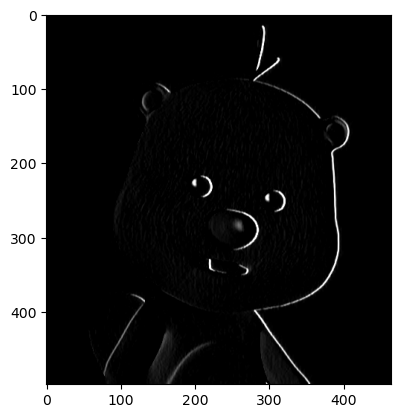

In [39]:
sobel =cv2.Sobel(gray_img, cv2.CV_8U, 1, 0, 5) #윤곽선 강조
plt.imshow(sobel, cmap='gray')
plt.show()

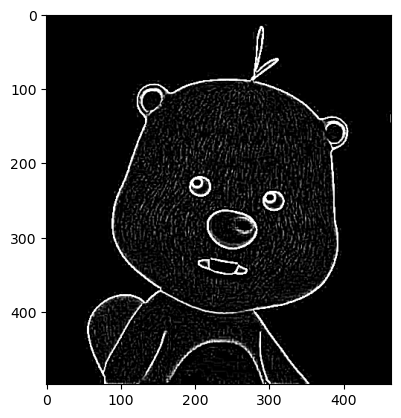

In [44]:
laplac = cv2.Laplacian(gray_img, cv2.CV_8U, ksize=5) #윤곽선 강조
plt.imshow(laplac, cmap='gray')
plt.show()

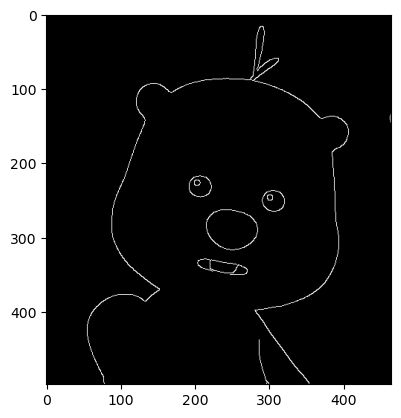

In [45]:
canny = cv2.Canny(gray_img, 122, 255) #윤곽선 강조
plt.imshow(canny, cmap='gray')
plt.show()

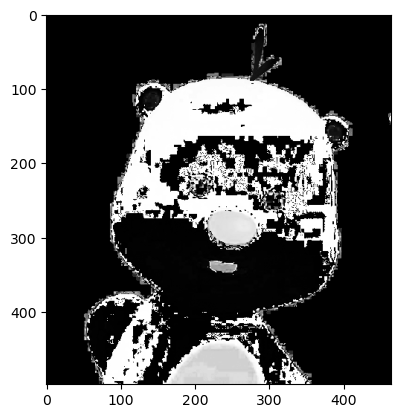

In [15]:
#색상 검출 HSV: Hue: 색상, Saturation: 채도, Value: 명도
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv[:, :, 0], cmap='gray') #색상(hue)
plt.show()

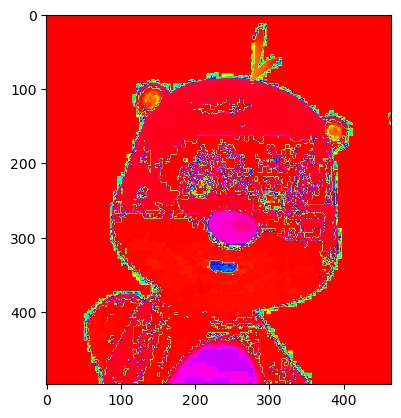

In [16]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv) #split: 채널 분리
plt.imshow(h, cmap='hsv')
plt.show()

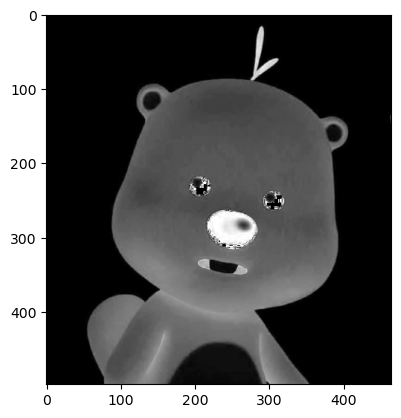

In [17]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv) #split: 채널 분리
plt.imshow(s, cmap='gray')
plt.show()

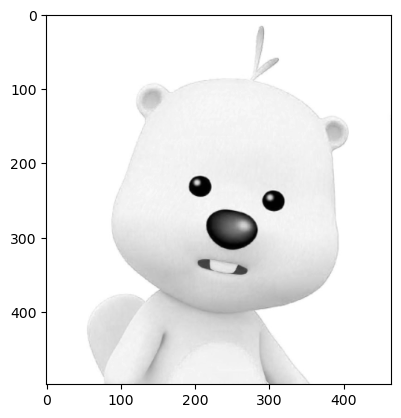

In [18]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv) #split: 채널 분리
plt.imshow(v, cmap='gray')
plt.show()

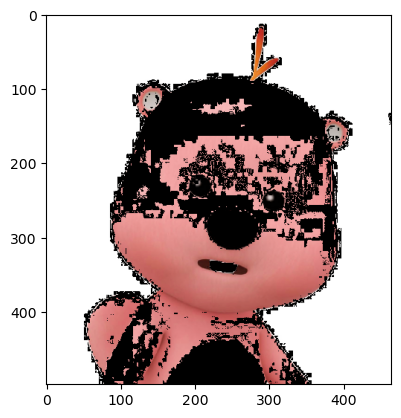

In [19]:
h_range = cv2.inRange(h, 0, 20)
orange = cv2.bitwise_and(hsv, hsv, mask=h_range)
orange = cv2.cvtColor(orange, cv2.COLOR_HSV2RGB)
plt.imshow(orange)
plt.show()

In [ ]:
#civitai.com
#type 쳐서 만들면됨   개인적인거임 공부 X 